# K-Nearest Neighbors on Custcat dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
df=pd.read_csv('teleCust1000t.csv')
print(df)

     region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9      64   4       5       0   
1         3      11   33        1        7     136   5       5       0   
2         3      68   52        1       24     116   1      29       0   
3         2      33   33        0       12      33   2       0       0   
4         2      23   30        1        9      30   1       2       0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0      27   3       0       0   
996       1       7   34        0        2      22   5       5       0   
997       3      67   59        0       40     944   5      33       0   
998       3      70   49        0       18      87   2      22       0   
999       3      50   36        1        7      39   3       3       0   

     gender  reside  custcat  
0         0       2        1  
1         0       6        4  
2         1       

In [16]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [17]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002195E174A88>]],
      dtype=object)

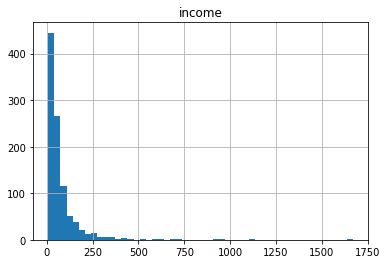

In [18]:
df.hist(column='income', bins=50)

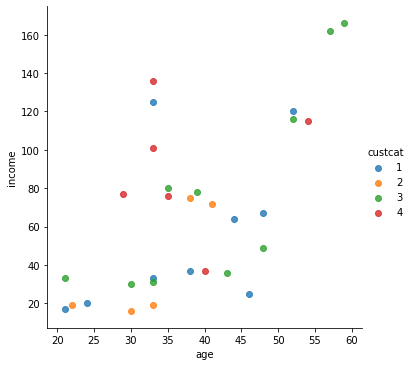

In [19]:
df1= df.head(30)
sns.lmplot(x = "age", y = "income", data = df1,  fit_reg = False, hue = 'custcat')

In [183]:
X = df[['region', 'tenure','age', 'address', 'income', 'reside']] .values
X[0:5]

array([[  2,  13,  44,   9,  64,   2],
       [  3,  11,  33,   7, 136,   6],
       [  3,  68,  52,  24, 116,   2],
       [  2,  33,  33,  12,  33,   1],
       [  2,  23,  30,   9,  30,   4]], dtype=int64)

In [184]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [185]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456, -0.25303431, -0.12650641,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, -0.4514148 ,  0.54644972,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.23481934,  0.35951747,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243,  0.04453642, -0.41625141,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797, -0.25303431, -0.44429125,
         1.16300577]])

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 100)


In [187]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (600, 6) (600,)
Test set: (400, 6) (400,)


In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
k = 3

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [190]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 4, 2, 1], dtype=int64)

In [192]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.585
Test set Accuracy:  0.2875


In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.2875

In [219]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, yhat)
r_squared = r2_score(y_test, yhat)

Text(0, 0.5, 'prediction')

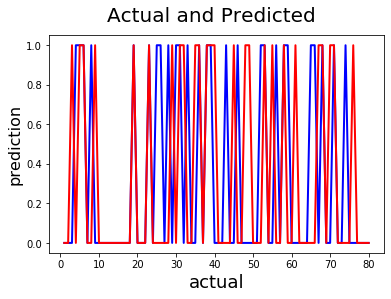

In [222]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,y_test,color='blue', linewidth=2, linestyle="-")
plt.plot(c,yhat, color='red',  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('actual', fontsize=18)                               # X-label
plt.ylabel('prediction', fontsize=16) 

Text(0, 0.5, 'Predicted_views')

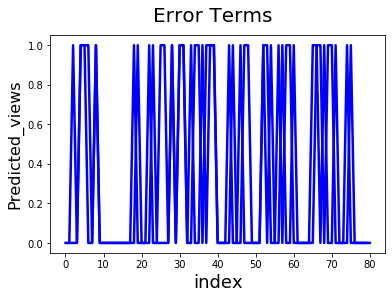

In [224]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,y_test, yhat, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('index', fontsize=18)                      # X-label
plt.ylabel('Predicted_views', fontsize=16)                # Y-label

# KNN Churn dataset

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11,33,7,136,5,5,0,1,1,4.40,...,1,0,1,1,0,1.482,3.033,4.913,4,1
1,33,33,12,33,2,0,0,0,0,9.45,...,0,0,0,0,0,2.246,3.240,3.497,1,1
2,23,30,9,30,1,2,0,0,0,6.30,...,0,0,0,1,0,1.841,3.240,3.401,3,0
3,38,35,5,76,2,10,1,1,1,6.05,...,1,1,1,1,1,1.800,3.807,4.331,4,0
4,7,35,14,80,2,15,0,1,0,7.10,...,0,0,1,1,0,1.960,3.091,4.382,3,0


In [195]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless']]
X[0:5]

,tenure,age,address,income,ed,employ,equip,callcard,wireless
0,11,33,7,136,5,5,0,1,1
1,33,33,12,33,2,0,0,0,0
2,23,30,9,30,1,2,0,0,0
3,38,35,5,76,2,10,1,1,1
4,7,35,14,80,2,15,0,1,0


In [196]:
y = churn_df['churn'].astype('int')
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 100)

In [198]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 9) (120,)
Test set: (80, 9) (80,)


In [199]:
from sklearn.neighbors import KNeighborsClassifier
k = 3

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [200]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 1])

In [201]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [202]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8666666666666667
Test set Accuracy:  0.6375


In [203]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.6375

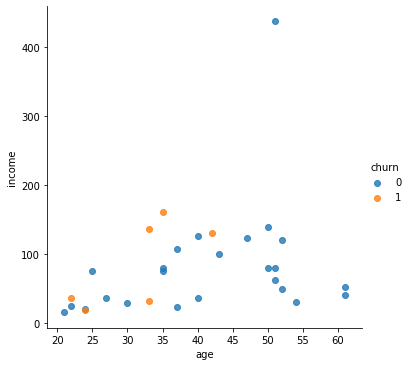

In [204]:
df1= churn_df.head(30)
sns.lmplot(x = "age", y = "income", data = df1,  fit_reg = False, hue = 'churn')

In [205]:
from sklearn.metrics import confusion_matrix

In [206]:
cnf_matrix = confusion_matrix(y_test,yhat)

In [207]:
cnf_matrix

array([[39, 14],
       [15, 12]], dtype=int64)

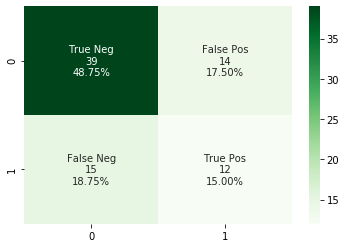

In [208]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix,fmt='', annot=labels,cmap='Greens')